### Task Image:

#### Dataset Link:
RGB Dataset can be found at " /data/rgb-images/ " in the respective challenge's repo.<br>
DICOM Dataset can be found at " /data/dicom-images/ " in the respective challenge's repo.

#### Description:
Images are needed to be preprocessed before feeding them into computer vision algorithms. Comman forms of image data are: 2D, RGB, dicom format, satellite images and 4D images. 2D images are grayscale images, RGB images are 3-channeled images representing color value of pixel, DICOM format is the standard for the communication and management of medical imaging information and related data, and 4D images (example - brain MRI scans) are slices of 3D images stacked on top of each other.

#### Objective:
How to load and process various formats of image for machine learning (Check out helpful links section to get hints)

#### Tasks:
- Read the rgb images provided and store their numerical representation in numpy array (matplotlib or PIL)
- Plot rgb image '9.jpeg'
- Print dimensions of image '12.jpeg'
- Convert any 5 images to grayscale and plot them

- Read the dicom images provided (dicom.read_file function)
- Print numerical representation of image '0009.DCM' (dicom_img.pixel_array attribute)
- Plot any dicom image (matplotlib.pyplot.imshow function)

#### Further fun (will not be evaluated):
- You already got familiar with complex unstructured data like rgb and dicom images, let's apply those skills to 2D images as well. Download the famous MNIST Dataset from https://www.kaggle.com/c/digit-recognizer/data . Read those 2D images and explore the dataset. Try out edge detection using sobel filter without using any libraries other than numpy.
- DICOM format contains much more information than just pixel values. Explore the data further.

#### Helpful Links:
- Awesome tutorial on image processing with numpy: http://www.degeneratestate.org/posts/2016/Oct/23/image-processing-with-numpy/
- Understand pydicom data structure and images - https://www.kaggle.com/avirdee/understanding-dicoms

In [2]:
pip install pydicom

     |████████████████████████████████| 35.4 MB 7.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [12]:

import os
import numpy as np
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

READ AND NUMERICAL REPRESENATION OF AN IMAGE

In [4]:
import matplotlib.image as mpimg
img = mpimg.imread('/Users/apple/Desktop/challenge-week-1/data/rgb_images/1.jpeg')
print(img)

[[[142 123 109]
  [141 122 108]
  [140 121 107]
  ...
  [136 117 102]
  [137 118 103]
  [138 119 104]]

 [[143 124 110]
  [142 123 109]
  [141 122 108]
  ...
  [137 118 103]
  [137 118 103]
  [137 118 103]]

 [[143 124 110]
  [143 124 110]
  [142 123 109]
  ...
  [139 120 105]
  [138 119 104]
  [137 118 103]]

 ...

 [[132 118 107]
  [132 118 107]
  [132 118 107]
  ...
  [141 128 109]
  [142 129 110]
  [142 129 110]]

 [[133 119 108]
  [133 119 108]
  [133 119 108]
  ...
  [141 128 109]
  [141 128 109]
  [142 129 110]]

 [[133 119 108]
  [133 119 108]
  [133 119 108]
  ...
  [142 129 110]
  [142 129 110]
  [142 129 110]]]


PLOT IMG 9

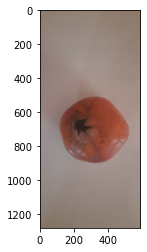

In [6]:
img9 = mpimg.imread("/Users/apple/Desktop/challenge-week-1/data/rgb_images/9.jpeg")
plt.imshow(img)
plt.show()

Print dimensions of image '12.jpeg'

In [8]:
image = Image.open("/Users/apple/Desktop/challenge-week-1/data/rgb_images/9.jpeg")
width, height = image.size
print("width: ",width)
print("height: ", height)

width:  590
height:  1280


CONVERT TO GRAY SCALE

In [13]:
from PIL import Image
imgG = Image.open('/Users/apple/Desktop/challenge-week-1/data/rgb_images/9.jpeg').convert('L')
gray_image = ImageOps.grayscale(imgG)
gray_image.show()

DICOM IMAGE

In [14]:
from pydicom.data import get_testdata_files
filename = get_testdata_files('/Users/apple/Desktop/challenge-week-1/data/dicom_images/0009.DCM')[0]
dataset = pydicom.dcmread(filename)
pat_name = dataset.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()

IndexError: list index out of range